In [1]:
import os
import sys
sys.path.insert(0, '/home/ubuntu/source/cloudknot/')
sys.path
import diff_classifier.imagej as ij
import boto3
import os.path as op
import diff_classifier.aws as aws
import cloudknot as ck
import diff_classifier.knotlets as kn
import numpy as np
import itertools

In [2]:
radius = [4.5, 6.0, 7.0]
do_median_filtering = [True, False]
quality = [1.5, 4.5, 8.5]
linking_max_distance = [6.0, 10.0, 15.0]
gap_closing_max_distance = [6.0, 10.0, 15.0]
max_frame_gap = [1, 2, 5]
track_displacement = [0.0, 10.0, 20.0]

sweep = [radius, do_median_filtering, quality, linking_max_distance, gap_closing_max_distance, max_frame_gap,
         track_displacement]
all_params = list(itertools.product(*sweep))

In [3]:
total = len(all_params)
partition = 100
runs = int(total/partition)+1

In [ ]:
to_track = {}
knot = {}
result_futures = {}
start_knot = 565

github_installs=('https://github.com/ccurtis7/diff_classifier.git')
my_image = ck.DockerImage(func=kn.sensitivity_it, base_image='arokem/python3-fiji:0.3', github_installs=github_installs)

docker_file = open(my_image.docker_path)
docker_string = docker_file.read()
docker_file.close()

req = open(op.join(op.split(my_image.docker_path)[0], 'requirements.txt'))
req_string = req.read()
req.close()

new_req = req_string[0:req_string.find('\n')-3]+'5.28'+ req_string[req_string.find('\n'):]
req_overwrite = open(op.join(op.split(my_image.docker_path)[0], 'requirements.txt'), 'w')
req_overwrite.write(new_req)
req_overwrite.close()

In [ ]:
for i in range(0, runs):
    run_name = "Run{}".format(i)
    experiments = np.linspace(i*partition, (i+1)*partition-1, partition).astype(int)
    
    knot[run_name] = ck.Knot(name='sensitivity_{}'.format(start_knot),
               docker_image = my_image,
               resource_type = "SPOT",
               bid_percentage = 100,
               memory = 16000,
               pars_policies=('AmazonS3FullAccess',))
    result_futures[run_name] = knot[run_name].map(experiments)
    start_knot = start_knot + 1
    print('Next knot name: {}'.format(start_knot))

In [ ]:
for key in knot:
    knot[key].clobber()

/home/ubuntu/source/diff-classifier/diff_classifier/knotlets.py:261: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
   

/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpp71fbmxo.py
Successful parameter calculations for P1_S1_R_0001_2_2_1


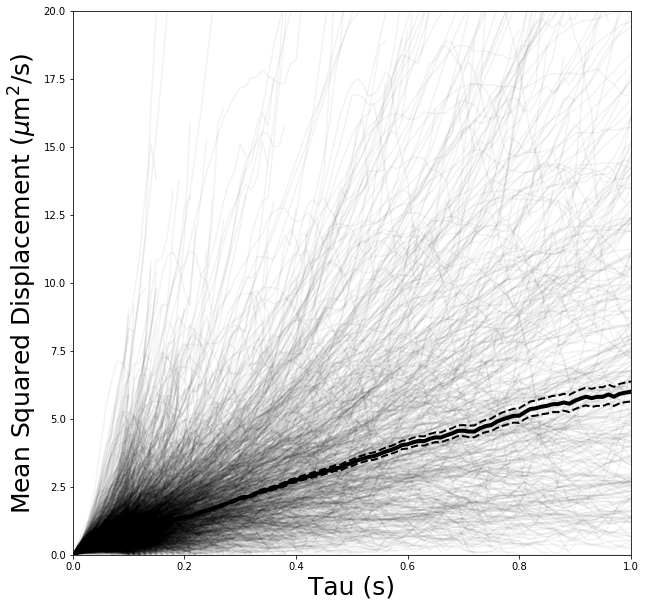

In [4]:
kn.sensitivity_it(1)

In [ ]:
from shapely.geometry import Point

In [ ]:
float(1)

In [ ]:
experiments.astype(int)